In [1]:
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [72]:
#Использую учебный датасет о поездках на такси, ограничиваю его 10000 строками для улучшения производительности
#Он ведь учебный :)
#Целевую переменную driver_responce игнорирую, она в этом задании не нужна
# Считаем, что все поездки состоялись
df = pd.read_csv('taxi.csv', nrows=10000)
print(df.shape)

(10000, 14)


In [71]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [7]:
df.distance_km.max()

1479.5379999999998

In [76]:
#Ограничиваю дальность поездок 100 км. чтобы исключить края распределения
df1 = df[df.distance_km < 100]

Text(0,0.5,'Number of journeys')

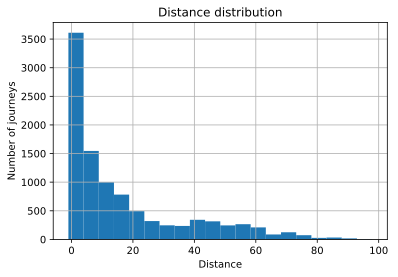

In [13]:
# Распределение поездок по расстоянию. Большинство поездок совершается на расстояние до 5 км
ax = df1.distance_km.hist(bins = 20)
ax.set_title('Distance distribution')
ax.set_xlabel('Distance')
ax.set_ylabel('Number of journeys')

In [31]:
import seaborn as sns

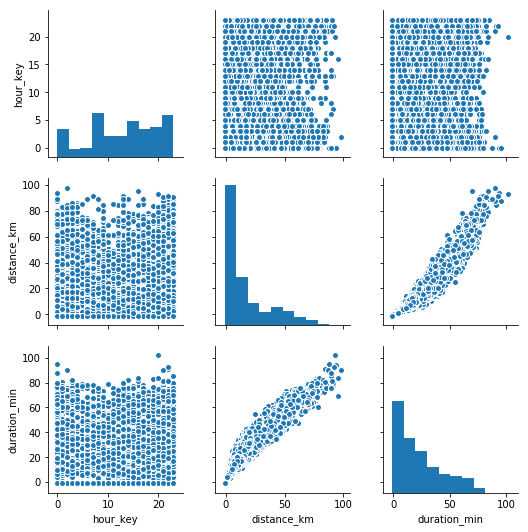

In [33]:
# рассматриваю зависимость дальности и продолжительности поездок от времени суток. Забавно, но в дневное время поездки 
# поездки чуть короче, чем в ночное
# прямая зависимость между дальностью и продолжительностью логична
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    df1[['hour_key', 'distance_km', 'duration_min']]);
sns_plot.savefig('pairplot.png')

In [19]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [78]:
#Добавляю к индексу шовера букву, чтобы система не воспринимала его как число
df1 = pd.concat([df1,pd.DataFrame(columns=list('d'))], axis=1)

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,d
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,NaN
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,NaN
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,NaN
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,NaN
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,NaN


In [79]:
df1.d='D'+df1.driver_gk.astype('str')
df1.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,d
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,D6080
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,D6080
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,D6080
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,D6080
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,D6080


In [82]:
# считаю число поездок и их общую продолжительность для каждого шофера
number_of_journeys_df = df1.groupby('d')[['offer_gk']].count()
total_km_df = df1.groupby('d')[['distance_km']].sum()


,distance_km
d,
D1186,1958.825
D1399,778.796
D1479,1711.633
D1514,4972.628
D156,1734.340


In [87]:
driver_df = number_of_journeys_df.join(total_km_df)


,offer_gk,distance_km
d,,
D1186,210,1958.825
D1399,70,778.796
D1479,176,1711.633
D1514,555,4972.628
D156,157,1734.340


In [91]:
driver_df.columns = ['number_of_journeys', 'total_km']
driver_df.sort_values('number_of_journeys', inplace=True)
driver_df = driver_df.apply(lambda x: 100*x/driver_df.sum(), axis = 1)
driver_df.head()

,number_of_journeys,total_km
d,,
D5909,0.591360,0.324508
D6272,0.601383,0.423090
D5059,0.641475,0.401984
D1399,0.701614,0.474770
D2115,0.912098,0.686974


In [92]:
# Самый активный шофер D3507
trace0 = go.Bar(
    x=driver_df.index,
    y=driver_df.number_of_journeys,
    name='number_of_journeys',
    orientation = 'v'
)

trace1 = go.Bar(
    x=driver_df.index,
    y=driver_df.total_km,
    name='total_km',
    orientation = 'v'
)

data = [trace0, trace1]
layout = {'title': 'Driver_share'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [28]:
#Распределение дальности поездки в зависимости от класса
data = []

for offer_class in df1.offer_class_group.unique():
    data.append(
        go.Box(y=df1[df1.offer_class_group==offer_class].distance_km, 
               name=offer_class)
    )
iplot(data, show_link = False)

In [39]:
# Число и средняя длительность поездки по дням недели
weekday_journeys_df = df1.groupby('weekday_key')[['offer_gk']].count()
mean_distance_df = df1.groupby('weekday_key')[['distance_km']].mean()
mean_weekday_df = weekday_journeys_df.join(mean_distance_df)
    
mean_weekday_df.head()

,offer_gk,distance_km
weekday_key,,
0,1190,19.832179
1,1344,17.036602
2,1428,14.559144
3,1071,13.385715
4,1303,13.026942


In [40]:
trace0 = go.Scatter(
    x=mean_weekday_df.distance_km,
    #y=genres_df.Global_Sales,
    mode = 'markers+text',
    text = mean_weekday_df.index,
    #textposition='bottom',
    marker = dict(
        size = 1/10*mean_weekday_df.offer_gk,
        color = [
            'aqua', 'azure', 'beige', 'lightgreen',
            'lavender', 'lightblue'
        ]
    )
)

data = [trace0]
layout = {
    'title': 'Statistics of taxi journeys',
    'xaxis': {'title': 'Mean distance'},
#    'yaxis': {'title': 'User Score'}
}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)